In [1]:
# Let us import some awesome libraries!
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Let us load the datasets.

# This one contains global informations on the commits and their commiters.
exploration = pd.read_csv('results/exploration.csv')

# This one is the result of a study of the 'git diff' commands for each of them, in order to put them in a category.
classification = pd.read_csv('results/classification.csv')

In [3]:
# Just a bit of style. ;)
sns.set_palette(sns.color_palette("hls", 8));

# Commits exploration

The *exploration* dataset contains very basic informations on the commits: 

* **COMMIT_HASH** is the unique identifier of the commit on the repository.
* **AUTHOR_NAME** and **AUTHOR_EMAIL** are the identity of the author of the commit.
* **MODIFICATIONS_COUNT** is the number of modified files in the commit.
* **TIMESTAMP** is the timestamp at which the commit has been made.

Let us take a look on some of the lines. 
As we have build the datasets ourself, we already know that there is no missing value.

In [4]:
print('The dataset contains informations about', len(exploration), 'commits.')

exploration.sample(10)

The dataset contains informations about 24036 commits.


,COMMIT_HASH,AUTHOR_NAME,AUTHOR_EMAIL,MODIFICATIONS_COUNT,TIMESTAMP
16079,5ea9aad7ecb3d907ee2dbaeb14f25cda3768e698,Manoj-Kumar-S,manojkumarsivaraj334@gmail.com,2,1390482707000
7257,e9f432a3c49742c0cbf42dcfd0364fb7d3223ddd,Vlad Niculae,vlad@vene.ro,2,1324340029000
4429,8526ab686c16136a39693da3a4a605c8198b3363,Lars Buitinck,larsmans@gmail.com,1,1307788517000
23942,bdc20edf8692195ce0f817af0082c5ede1e35f4a,Guillaume Lemaitre,g.lemaitre58@gmail.com,1,1512993891000
4684,e17ae1fd0461d06393aac38a171021381207c6b5,Fabian Pedregosa,fabian.pedregosa@inria.fr,1,1305529856000
8939,d452cde4a1e31b59f003e77cc51dc32f2f2249f4,Peter Prettenhofer,peter.prettenhofer@gmail.com,11,1332451705000
13896,44b7be193c698ea94f93e401ef555839db3f09b2,Yann N. Dauphin,dhaemon@gmail.com,1,1366054967000
7705,9a46722a862832701deff8206aef720fbc5079f6,Olivier Grisel,olivier.grisel@ensta.org,1,1325250816000
993,53daf5e2bb0887dafd6cd5ad2aa2daa8b40137a6,Fabian Pedregosa,fabian.pedregosa@inria.fr,2,1277556473000
3949,455ad649f9e8c870dd6f213d5181b3f1aaf92bb8,Peter Prettenhofer,peter.prettenhofer@gmail.com,2,1304527955000


## What can we infer...

### ... about the authors?

#### How many unique contributors have worked on this repository?

In [5]:
authors = exploration['AUTHOR_NAME'].value_counts()

print('There is', len(authors), 'unique contributors on the repository.')

There is 1225 unique contributors on the repository.


#### Who are the persons who committed the most?

In [14]:
authors.head(5)

Olivier Grisel        2287
Andreas Mueller       2091
Fabian Pedregosa      1674
Lars Buitinck         1283
Alexandre Gramfort    1078
Name: AUTHOR_NAME, dtype: int64

#### Do contributors commit once?

In [7]:
authors.describe()

count    1225.000000
mean       19.621224
std       128.629878
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      2287.000000
Name: AUTHOR_NAME, dtype: float64

### ... about the number of modifications per commit?

#### Is there a lot of files modified in a commit?

In [8]:
exploration['MODIFICATIONS_COUNT'].describe()

count    24036.000000
mean         4.843859
std         27.531903
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        911.000000
Name: MODIFICATIONS_COUNT, dtype: float64

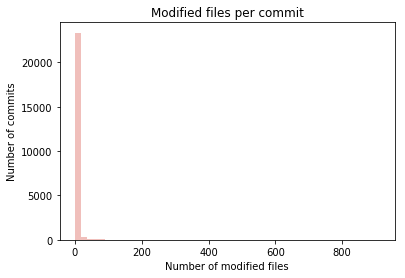

In [9]:
sns.distplot(exploration['MODIFICATIONS_COUNT'], kde = False)
plt.title('Modified files per commit')
plt.xlabel('Number of modified files')
plt.ylabel('Number of commits');

### Did the commits modify more files at the project start?

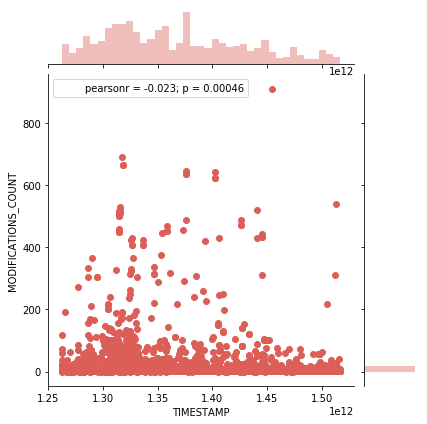

In [10]:
sns.jointplot(x = 'TIMESTAMP', y = 'MODIFICATIONS_COUNT', data = exploration);

### ... about the timestamps?

#### Was there more commits at the project start?

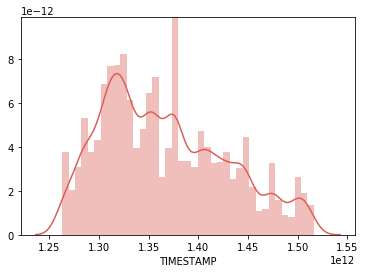

In [49]:
sns.distplot(exploration['TIMESTAMP'])

# Commits classification

The *classification* dataset is the output of the *git diff*s analysis.

For now, we classify commits in three categories :
* **DOCUMENTATION** for the commits which add commentaries and add/modify documentation files.
* **FEATURE_ADD** for the commits which add new functionalities.
* **MAINTENANCE** for the commits which do refactor, performance enhancement, ...

For each category, we try to define relevant metrics knowing that some metrics may be shared by two categories. For each, we produce a coefficient which represent more or less the number of lines which fit the category (a same line may be count several time if it fits several metrics for one category, ...). If all coefficients are zero, we put **UNKNOWN** as commit category.

There is fewer commits than at the exploration phase because some metrics use the diff and it is source of bugs for now.

In [11]:
print('The dataset contains informations about', len(classification), 'commits.')

classification.sample(10)

The dataset contains informations about 23580 commits.


,COMMIT_HASH,PREDICTED,DOCUMENTATION,FEATURE_ADD,MAINTENANCE
17176,f887cce6e33346cc3764b71d897b2cf209be8c47,UNKNOWN,0,0,0
19991,e103c317b302b16cb912c65f6206b98b9168c887,UNKNOWN,0,0,0
14752,f7026b04f5e5909aa15848b25de2becd675871a9,UNKNOWN,0,0,0
16580,2c836780222a9ab8dd9ce1b59448e7f1c3bfb01b,UNKNOWN,0,0,0
8972,b93105e8febec3981e5b3521ed301e9e3ea6fd1b,FEATURE_ADD,1,9,0
9690,da968171cfaebb411ca7e781b29052fe068657e4,UNKNOWN,0,0,0
16989,7f49bc178142b08001682449de1d134eed7abdef,DOCUMENTATION,2,1,0
18445,a2c8d1214a99ef36fcb81107c420dd7b24fe6c11,DOCUMENTATION,20,14,0
8233,f758445479a28e2c169789f38011834cf27f3d41,UNKNOWN,0,0,0
22592,e19bb7ce5a0c8d1d2a2575d4a3181aec18494509,DOCUMENTATION,2,2,0


#### Predicted categories

Text(0,0.5,'Number of commits')

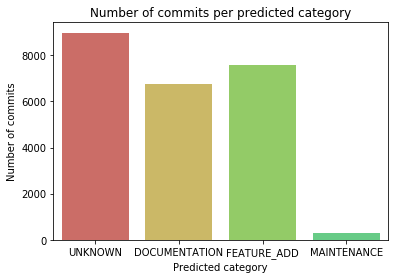

In [31]:
sns.countplot(classification['PREDICTED'])
plt.title('Number of commits per predicted category')
plt.xlabel('Predicted category')
plt.ylabel('Number of commits')

#### Correlation between coefficients

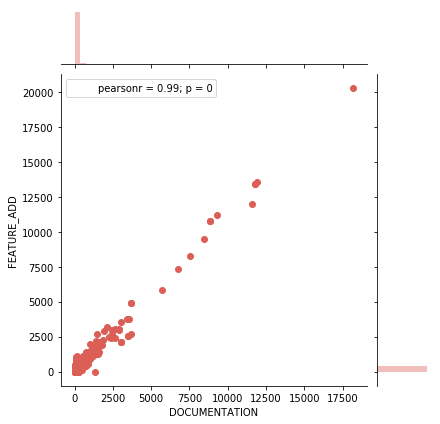

In [39]:
sns.jointplot(x = 'DOCUMENTATION', y = 'FEATURE_ADD', data = classification);

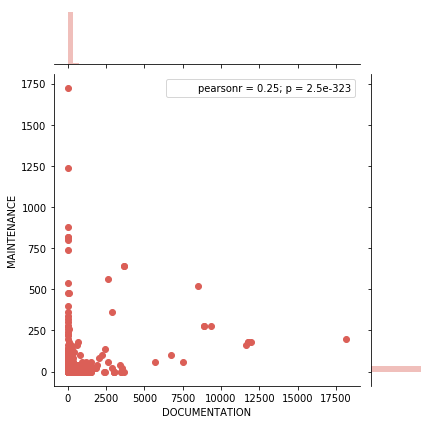

In [41]:
sns.jointplot(x = 'DOCUMENTATION', y = 'MAINTENANCE', data = classification);

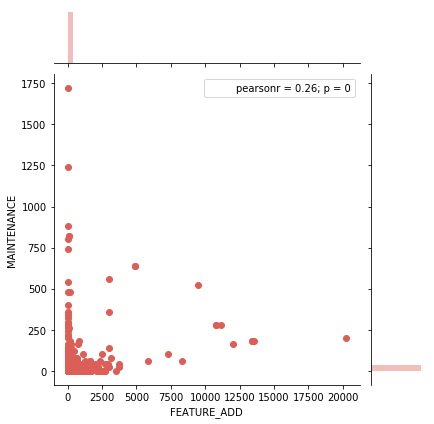

In [42]:
sns.jointplot(x = 'FEATURE_ADD', y = 'MAINTENANCE', data = classification);